In [1]:
import numpy as np
import matplotlib.pyplot as plt

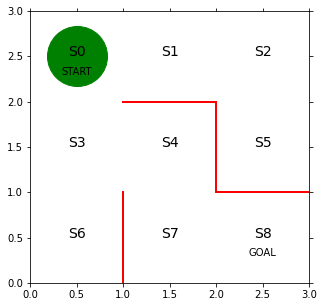

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

xpos = [0.5, 1.5, 2.5]
ypos = [2.5, 1.5, 0.5]
for y in range(3):
    for x in range(3):
        plt.text(xpos[x], ypos[y], 'S' + str(y * 3 + x), size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)


In [7]:
# 上 右 下 左
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, np.nan, 1],
    [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, np.nan, np.nan, np.nan],
    [1, np.nan, np.nan, np.nan],
    [1, 1, np.nan, np.nan],
])

In [8]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i,:] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [9]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [10]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
    return s_next
    
    

In [11]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [24]:
state_history = goal_maze(pi_0)

In [25]:
print(state_history)

[0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 3, 4, 7, 8]


In [26]:
from matplotlib import animation
from IPython.display import HTML

In [27]:
def init():
    line.set_data([], [])
    return (line,)

In [28]:
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [29]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history),
                               interval=200, repeat=False)

HTML(anim.to_jshtml())